# PS2
## Group 23

In [2]:
import wrds 
import psycopg2
db=wrds.Connection(wrds_username='matteo_ferrazzi')

Loading library list...
Done


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels as sm
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sma


In [4]:
#define start and end date
start='1999-12-31'
end='2022-12-31'
df = pd.read_csv("Returns_Stocks.csv", sep=";")
df.set_index("date", inplace=True)

# (a) 
Calculate averages and standard deviations

In [5]:
#mean
averages = df.mean(skipna=True)
print("averages are : \n", averages)
#standard deviation
volatilities = df.var(skipna=True)
print("volatilities are : \n", volatilities)

averages are : 
 AAPL    0.001409
GE      0.000059
GME     0.002026
PG      0.000421
TSLA    0.001590
dtype: float64
volatilities are : 
 AAPL    0.000522
GE      0.000445
GME     0.001295
PG      0.000140
TSLA    0.002563
dtype: float64


# (b) 
Plot the empirical density function of return and make comparsison with:
 1) Normal distribution with same mean and standard deviation.
 2) Winsorized Normal distribution.

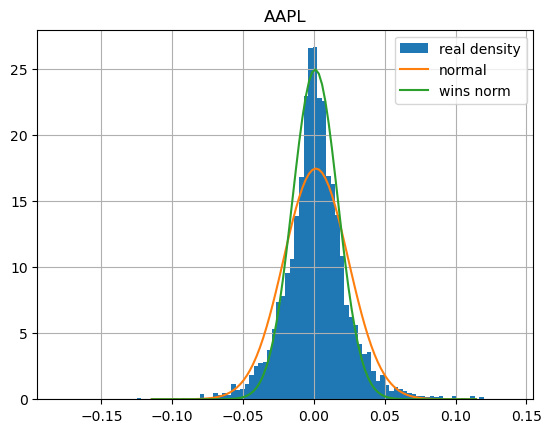

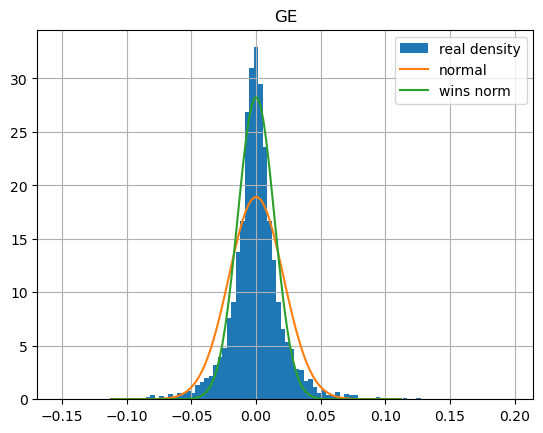

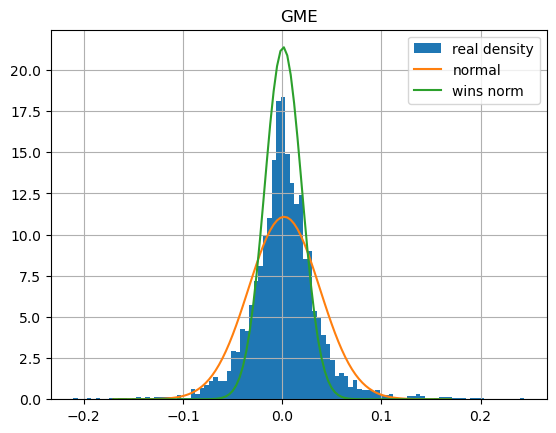

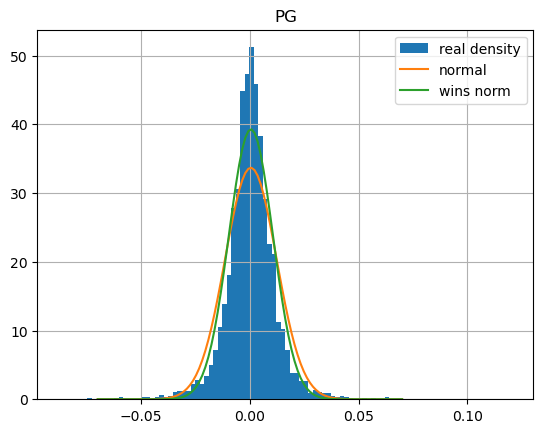

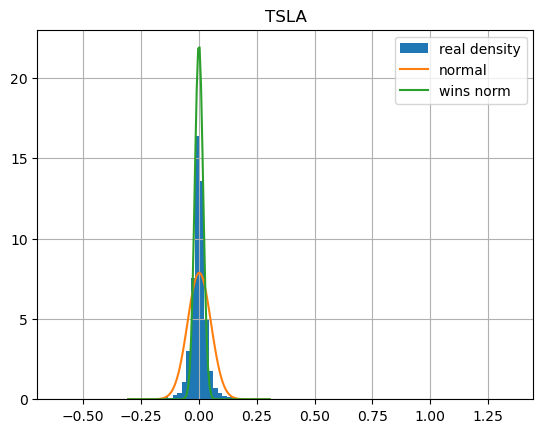

In [28]:
#plot
for column in df:
  df.hist(column=column, density=True, bins=100, label="real density")
  x = np.linspace(df[column].quantile(0.001), -df[column].quantile(0.001) , 100)
  win = df[abs(df[column])<0.04]
  plt.plot(x, stats.norm.pdf(x, df[column].mean(), df[column].std()), label = "normal")
  plt.plot(x, stats.norm.pdf(x, win[column].mean(), win[column].std()), label = "wins norm")
  plt.legend() 

# (c) 
For each stock, we computed and compared the 95% and 99% Value-at-Risk and Conditional Expected Shortfall from the empirical distribution of returns.<p>
We interpreted the Var as the 95th-quantile of the loss distribution or, equivalently, considering $ R=-L $ the 5th-quantile of return distribution, in particular we applied the formula: $$ VaR_{1-p} =  \{\ell : P(R < \ell) = p\}$$ <p>
With this formulation we consider the $VaR_{1-p}$ as the $\ell$ such that a return lower than the $VaR_{1-p}$ has probability p. We use this formulation to be consistent with the formulation of VaR provided in the next exercise.<p>
Therefore, we interpreted the Conditional Expected shortfall as the expected return given that return is below the VaR limit.
$$ES_{1-p} = E[R | R < Var_{1-p}]$$
We used return rather than losses, so as before we inverted the inequality.
Knowing that the return are normally distributed we can use the following formula to compute the Conditional Expected Shortfall:
$$ES_{1-p} = \mu - \sigma \frac{\phi(\Phi^{-1}(1-p))}{p} $$

In [7]:
for column in df :
  for i in (0.01, 0.05):
    var = df[column].quantile(i)
    short_f = df[column][df[column] <= var].mean()
    norm_var = norm.ppf(i, df[column].mean(), df[column].std())
    norm_short_f = df[column].mean() - df[column].std() * (norm.pdf(norm.ppf(1-i)) / i)
    print(column ,"at level : ", 1-i," has Var : ", np.round(var,5), "ES : ",np.round(short_f,5), "Norm Var : ", np.round(norm_var,5),
          "Norm ES :", np.round(norm_short_f,5) ,"\n")

AAPL at level :  0.99  has Var :  -0.05758 ES :  -0.07928 Norm Var :  -0.05177 Norm ES : -0.05951 

AAPL at level :  0.95  has Var :  -0.03407 ES :  -0.05018 Norm Var :  -0.03619 Norm ES : -0.04574 

GE at level :  0.99  has Var :  -0.06121 ES :  -0.08425 Norm Var :  -0.04899 Norm ES : -0.05614 

GE at level :  0.95  has Var :  -0.03102 ES :  -0.04996 Norm Var :  -0.03462 Norm ES : -0.04343 

GME at level :  0.99  has Var :  -0.08997 ES :  -0.12745 Norm Var :  -0.0817 Norm ES : -0.0939 

GME at level :  0.95  has Var :  -0.0511 ES :  -0.07886 Norm Var :  -0.05717 Norm ES : -0.07221 

PG at level :  0.99  has Var :  -0.03336 ES :  -0.04716 Norm Var :  -0.02713 Norm ES : -0.03114 

PG at level :  0.95  has Var :  -0.01679 ES :  -0.02772 Norm Var :  -0.01906 Norm ES : -0.02401 

TSLA at level :  0.99  has Var :  -0.10682 ES :  -0.17189 Norm Var :  -0.11619 Norm ES : -0.13334 

TSLA at level :  0.95  has Var :  -0.05068 ES :  -0.08794 Norm Var :  -0.08169 Norm ES : -0.10284 



In [8]:
a=5.7349623065
np.round(a,5)

5.73496

# (d) 

Even if stocks' return seem to be symmetric normal distribution does not describe them exactly. In fact, returns seem to have fatter tails than normal distribution. Winsorization would partly fix this problem but there is still difference in the distribution. The real distribution is peakier than the normal one, meaning that it has more values close to the mean. Also in this case the winsorization mitigates the problem even if it does not solve it completely.<p> 
Normal distribution seems to overestimate the probability of moderate changes from the mean, whereas it underestimates the probability of having outliers or avarage values.<p>
Now considering VaR and expected shortfall it is possible to notice that the VaR at level 95% is lower for the normal distribution while at 99% level it is lower for the real data. This underlines that stocks have fatter tails since the 1% quantile of their returns is lower than the normal one.<p> With respect to VaR expected shortfall allows us to understand better the distribution of stocks' return more extreme than the VaR. Both 95% and 99% ES are lower for the real data than for the normal, we can conclude that negative outliers in real data are more extreme than the normal ones. This is escpecially true if we notice that the VaR 95% is lower for normal data while ES 95% is lower for real data.<p>
Tesla has an anomalous behaviour, since it has extremely high and low outliers. So we should be careful to apply the above considerations given that such a behaviour risks to invalidate the analysis.


# (e)

averages are : 
 b2ret     0.002098
b10ret    0.003480
dtype: float64
volatilities are : 
 b2ret     0.000024
b10ret    0.000420
dtype: float64


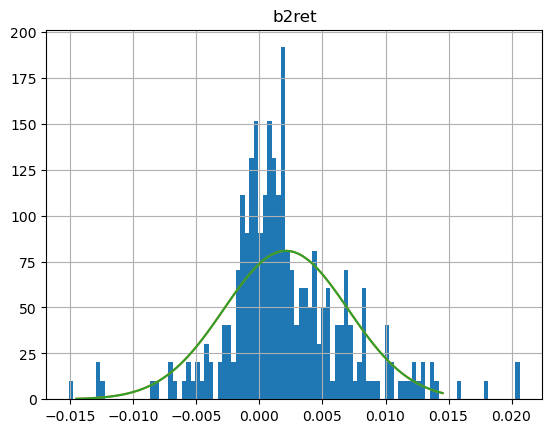

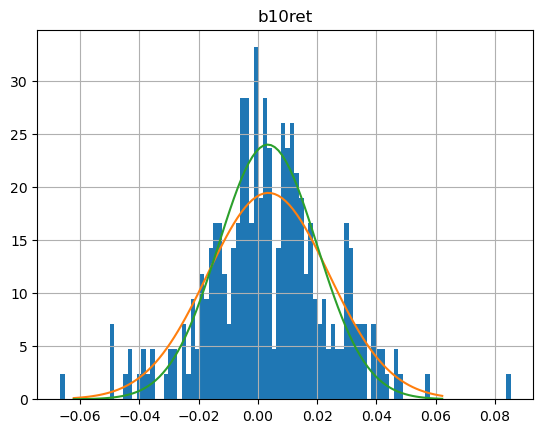

In [31]:
## bonds
df_b = pd.read_csv("Returns_Bonds.csv", sep=";")
df_b.dropna()
df_b.set_index("date", inplace=True)

#mean
averages = df_b.mean(skipna=True)
print("averages are : \n", averages)
#standard deviation
volatilities = df_b.var(skipna=True)
print("volatilities are : \n", volatilities)

for column in df_b:
  df_b.hist(column=column, density=True, bins=100)
  x = np.linspace(df_b[column].quantile(0.001), -df_b[column].quantile(0.001) , 100)
  win = df_b[abs(df_b[column])< 0.04]
  plt.plot(x, stats.norm.pdf(x, df_b[column].mean(), df_b[column].std()))
  plt.plot(x, stats.norm.pdf(x, win[column].mean(), win[column].std())) 

The bonds seem to have less extreme outliers compared to stocks, hence the normal distribution, even without winsorization is a better proxi for real values, even if there are still differences.<p> For 2-yr bonds the normal distribution is almost equal with and without winsorization since there are not values above 4% in absolute value.<p> About 2-yrs bond there is a positive skewness, meaning that the probability of extremly negative return is loweer than a positive one.<p> Bonds with higher maturity seem to better fit the normal distribution.

# Exercise 2

Import the data

In [10]:
aapl=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='2000-01-01' and date<='2022-12-31'")
aapl=aapl.rename(index=aapl["date"], columns={"ret": "AAPL"})
pg=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='2000-01-01' and date<='2022-12-31'")
pg=pg.rename(index=pg["date"], columns={"ret": "PG"})

In [11]:
data=pd.merge(aapl,pg,on="date")
data.set_index("date",inplace=True)
data.index=pd.to_datetime(data.index,format="%Y-%m-%d")


# (a)
We computed the annualized means, std deviations for each stock as well their correlation.
Starting from the daily returns we got the weekly ones and then we annualized them

In [12]:
log_r=np.log(1+data)
log_w_r=log_r.resample('W').sum()
ret=np.exp(log_w_r)-1
means=ret.mean()*52
stan_dev=ret.std()*np.sqrt(52)
print('The means are :\n',means)
print('The std deviations are :\n',stan_dev)
print('The correlation is : ',ret.corr().values[0,1])

The means are :
 AAPL    0.295706
PG      0.093634
dtype: float64
The std deviations are :
 AAPL    0.375583
PG      0.208181
dtype: float64
The correlation is :  0.10587600932882087


In [13]:
cov=ret.cov()*52

# (b)
Varying the weight of each stock between -1 and 2, we computed the mean-std deviation frontier and we plot it.

In [14]:
w=np.linspace(-1,2,1000)
muw=w*means[0]+(1-w)*means[1]
stdw=np.sqrt(w**2*cov.values[0,0]+2*w*(1-w)*cov.values[1,0]+(1-w)**2*cov.values[1,1])

<function matplotlib.pyplot.show(close=None, block=None)>

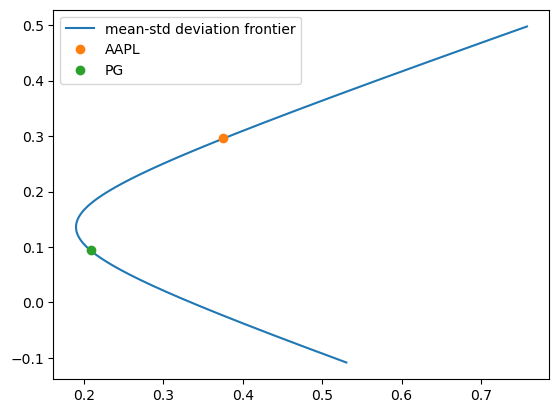

In [25]:
plt.plot(stdw,muw,label='mean-std deviation frontier')
plt.plot(stan_dev[0],means[0],'o',label='AAPL')
plt.plot(stan_dev[1],means[1],'o',label='PG')
plt.legend()
plt.show

# (c)
We computed the weights of the minimum variance portfolio:
$w_{min}=\frac{\Sigma^{-1}1}{1^T\Sigma^{-1}1}$<p>
Then we computed its expected return, standard deviation and sharpe ratio

In [16]:
rf=0.015
mu=means.values
ones=np.ones((1,2))
sigma=cov.values
A=np.dot(ones,np.dot(np.linalg.inv(sigma),np.transpose(ones)))
B=np.dot(ones,np.dot(np.linalg.inv(sigma),np.transpose(mu)))
C=np.dot(mu,np.dot(np.linalg.inv(sigma),np.transpose(mu)))
D=A*C-B**2
w_min=np.dot(np.linalg.inv(sigma),np.transpose(ones))/A
exp_ret=np.dot(mu,w_min)
std_min=np.sqrt(np.dot(np.transpose(w_min),np.dot(sigma,w_min)))
SR=(exp_ret-rf)/std_min
print('The expected return of the minimum variance portfolio is : ',exp_ret[0])
print('The std deviation of the minimum variance portfolio is : ',std_min[0,0])
print('The sharpe ratio of the minimum variance portfolio is : ',SR[0,0])




The expected return of the minimum variance portfolio is :  0.1358440814169205
The std deviation of the minimum variance portfolio is :  0.189777182017044
The sharpe ratio of the minimum variance portfolio is :  0.6367682359519251


# (d)
To plot the mean-standard deviation frontier with also the risk-free asset we, firstly, computed the mean and standard deviation of the tangent portfolio:$$\mu_{tan}=\frac{C-Br_f}{B-Ar_f}$$ $$\sigma_{tan}^2=\frac{C-2Br_f+Ar_f^2}{(B-Ar_f)^2}$$with $$A=1'\Sigma^-11$$ $$B=1'\Sigma^-1\mu$$ $$C=\mu'\Sigma^-1\mu$$ 1 a vector of ones and $\mu$ the vector of the means of the two stocks.<p>Then knowing that, in this case, the frontier is a linear combination of the risk-free asset and tangent portfolio we plot it allowing also for short selling of both the risk-free asset and the tangent portfolio.

The expected return of the tangent portfolio is :  0.20834913991933535
The std deviation of the tangent portfolio is :  0.24005039415733712


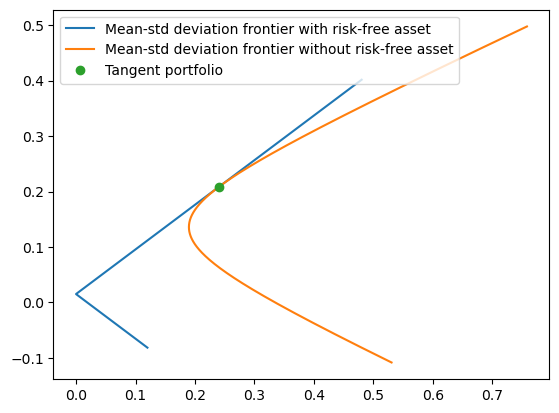

In [27]:
mu_tan=(C-B*rf)/(B-A*rf)
sigma_tan=np.sqrt((C-2*B*rf+A*rf**2)/(B-A*rf)**2)
print('The expected return of the tangent portfolio is : ',mu_tan[0,0])
print('The std deviation of the tangent portfolio is : ',sigma_tan[0,0])

w=np.linspace(-0.5,2,10000)
mu_rf=w*mu_tan[0]+(1-w)*rf
std_rf=abs(sigma_tan[0]*w)

plt.plot(std_rf,mu_rf,label='Mean-std deviation frontier with risk-free asset')
plt.plot(stdw,muw,label='Mean-std deviation frontier without risk-free asset')
plt.plot(sigma_tan,mu_tan,'o',label='Tangent portfolio')
plt.legend()
plt.show()

# (e)
We considered the return only for the period from 2010/01/01 to 2020/12/31 and computed the correlation in that period. Then we repeated the previous passages to plot the mean-std deviation frontier with the new correlation. 

The new correlation is :  0.31862945945851456


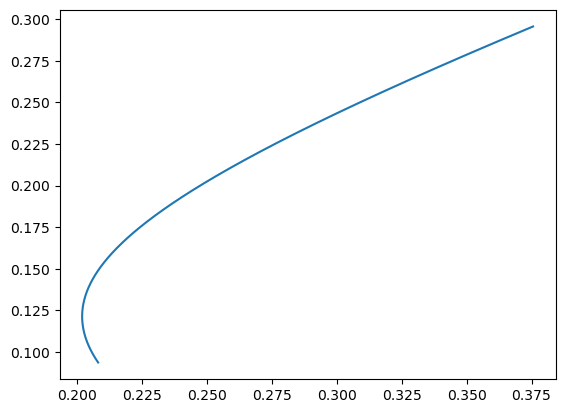

In [18]:
ret1=ret[(ret.index>='2010-01-01') & (ret.index<='2020-12-31')]
corr1=ret1.corr().values[0,1]
print('The new correlation is : ',corr1)
covariance=corr1*stan_dev[0]*stan_dev[1]
sigma1=np.array([[cov.values[0,0],covariance],[covariance,cov.values[1,1]]])
w=np.linspace(0,1,1000)
muw1=w*means[0]+(1-w)*means[1]
stdw1=np.sqrt(w**2*sigma1[0,0]+2*w*(1-w)*sigma1[1,0]+(1-w)**2*sigma1[1,1])

plt.plot(stdw1,muw1)

We computed the weights of the minimum variance portfolio with the new correlation.
Since the new correlation is higher we can hedge ourselves less using the two assets therefore the volatility of the minimum variance portfolio that we can achieve combining them would be higher. 

In [19]:
A1=np.dot(ones,np.dot(np.linalg.inv(sigma1),np.transpose(ones)))
w_min1=np.dot(np.linalg.inv(sigma1),np.transpose(ones))/A1
std_min1=np.sqrt(np.dot(np.transpose(w_min1),np.dot(sigma1,w_min1)))
print('The new volatility of the minimum variance portfolio is : ',std_min1[0,0])

The new volatility of the minimum variance portfolio is :  0.20203050850347548


# (f)
Starting from a standard deviation of 0.2 we computed the mean of our portfolio inverting the formula: $$\sigma_p^2(\mu_p)=\frac{(\mu_p-r_f)^2}{C-2r_fB+r_f^2A}$$
Then knowing the mean of our portfolio we computed $\gamma$: $$\gamma=\frac{\mu_p-r_f}{C-2r_fB+r_f^2A}$$ and the weights of the portfolio: $$w=\gamma\Sigma^-1(\mu-r_f1)$$
The weight put in the risk free asset is $w_{r_f}=1-w_{aapl}-w_{pg}$

In [20]:
sigmap=0.2
mup=rf+sigmap*np.sqrt((C-2*rf*B+rf**2*A))
gamma=(mup-rf)/(C-2*rf*B+rf**2*A)
w1=gamma*np.dot(np.linalg.inv(sigma),(np.transpose(mu)-rf))
w0=1-np.sum(w1[0])
print('weights: \n AAPL:',w1[0,0],'\n PG: ',w1[0,1],'\n risk-free asset: ',w0)

weights: 
 AAPL: 0.472980036114148 
 PG:  0.36017835423997596 
 risk-free asset:  0.16684160964587602


Since $w=\gamma\Sigma^-1(\mu-r_f1)$ where $\mu$ is the vector of the means and $w=\frac{1}{a}\Sigma^-1(\mu-r_f1)$ we get $a=\frac{1}{\gamma}$

In [21]:
a=1/gamma
print('The implied risk aversion coefficient is',a[0,0])

The implied risk aversion coefficient is 4.027261454788693


In [22]:
mean_ret=w0*rf+np.dot(w1[0],means)
print('The mean return of the optimal porfolio is',mean_ret)
SR1=(mean_ret-rf)/sigmap
print('The sharpe ratio of the optimal porfolio is',SR1)

The mean return of the optimal porfolio is 0.17609045819154776
The sharpe ratio of the optimal porfolio is 0.8054522909577388


Targeting a 99% VaR of -10% means that $P(R \leq -0.1)=0.01$ where R is the return of the portfolio.<p>
Using that $R=wr_{tan}+(1-w)r_f$ and assuming that $r_{tan}$ is normal we get $$w=\frac{0.1+r_f}{r_f-\Phi^{-1}(0.01)\sigma_{tan}-\mu_{tan}}$$


In [23]:
phi099=norm.ppf(0.01)
w_var=(0.1+rf)/(rf-phi099*sigma_tan-mu_tan)
print('The weight in the tangency portfolio is : ',w_var[0,0])

The weight in the tangency portfolio is :  0.31498945738436335
